In [1]:
#coding: utf-8

# 导入库
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from jqdata import *


# 设置起始时间和股票池
begin = "2014-10-01"
end = "2014-12-30"
#["000001.SZ","000002.SZ","000003.SZ","000005.SZ","000006.SZ","000007.SZ","000008.SZ","000009.SZ","000010.SZ"]
Tdays = get_trade_days(begin,end)
Qt_columns = ['DCP', 'PB_0.8', 'A_stock_index'] #跌停比 Drop Down Propotion
Qt = [-9.9,-9,-8,-7,-6,-5,5,6,7,8,9,9.9]
Quantiles = pd.DataFrame(index =  Tdays, columns = [str(qt)for qt in Qt]+Qt_columns);print(Quantiles.columns)
#print(Tdays)
A_stock_index_data = get_price(security='000001.XSHG', start_date=begin, end_date=end, frequency='daily', fields=["close"], skip_paused=True, fq='pre')
#print A_stock_index_data.index,A_stock_index_data.head()
#
def get_DCP_date_distribution(end_date=end,begin_date=begin,days=None):
    print('entering get_DCP_date_distribution',end_date,begin_date,type(days) )
    trader_dates = get_trade_days(begin_date,end_date)
    pct_list = []#需要空仓的时间列表
    count_drop_down=0;down_thresh=-9.9
    
    for yesterday in trader_dates:
        # 计算昨天市场上跌停的股票占比propotion
        count_drop_down=0
        stock_list = list(get_all_securities('stock', yesterday).index)
        #print yesterday,len(stock_list)
        pct_all =get_price(security = stock_list,end_date=yesterday,fields=['pre_close','close'], count=1, frequency='daily', skip_paused=False,fq='pre')
        percent_yesterday_df = (pct_all['close']-pct_all['pre_close'])/pct_all['pre_close']*100
        #print type(percent_yesterday_df),len(percent_yesterday_df.columns)
        for j in Qt:
            if j <0:
                Quantiles.loc[yesterday,str(j)]=-len([num for num in percent_yesterday_df.iloc[0] if num < j])
            else:
                Quantiles.loc[yesterday,str(j)]=len([num for num in percent_yesterday_df.iloc[0] if num > j])
        
        #print type(factor_quantiles),factor_quantiles.index

        #跌停比以及PB分位数等数据插入
        percent_list = (percent_yesterday_df.iloc[0]).tolist()
        for item in percent_list:
            if item<=down_thresh: count_drop_down+=1
        propotion = count_drop_down*1.0000/len(stock_list)*100
        Quantiles.loc[yesterday,'DCP' ] = propotion;
        Quantiles.loc[yesterday,'A_stock_index']=A_stock_index_data.loc[yesterday]['close']
        #PB0.8分位数数据插入
        qt = query(valuation.code, valuation.pb_ratio).filter()
        df = get_fundamentals(qt, date=yesterday)
        # 计算昨天市场所有股票PB值的分位数
        factor_quantile = df.dropna().quantile(0.8)
        #print type(factor_quantile),factor_quantile
        Quantiles.loc[yesterday,'PB_0.8'] = factor_quantile.item()
        #print 'yesterday:',yesterday,Quantiles.loc[yesterday];raise
    return Quantiles
Quantiles = get_DCP_date_distribution(days=Tdays)
#print(Quantiles)
'''
#write_file('pc_quantiles_DCP_A_stock_index_data.csv', get_DCP_date_distribution(days=Tdays).to_csv(), append=False) #写到文件中
virtual_IO = read_file('pc_quantiles_DCP_A_stock_index_data.csv')
from six import StringIO,BytesIO
#instance_data = StringIO(virtual_IO) 
instance_data = BytesIO(virtual_IO) #TypeError: initial_value must be str or None, not bytes
Quantiles=pd.read_csv(instance_data,index_col='date')
print(Quantiles.columns)
'''

Index(['-9.9', '-9', '-8', '-7', '-6', '-5', '5', '6', '7', '8', '9', '9.9',
       'DCP', 'PB_0.8', 'A_stock_index'],
      dtype='object')
entering get_DCP_date_distribution 2014-12-30 2014-10-01 <class 'numpy.ndarray'>


/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  pre_factor_ref_date=_get_today())
/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  pre_factor_ref_date=_get_today())
/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: F

/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  pre_factor_ref_date=_get_today())
/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  pre_factor_ref_date=_get_today())
/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: F

/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  pre_factor_ref_date=_get_today())
/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  pre_factor_ref_date=_get_today())
/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: F

/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  pre_factor_ref_date=_get_today())
/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  pre_factor_ref_date=_get_today())
/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: F

"\n#write_file('pc_quantiles_DCP_A_stock_index_data.csv', get_DCP_date_distribution(days=Tdays).to_csv(), append=False) #写到文件中\nvirtual_IO = read_file('pc_quantiles_DCP_A_stock_index_data.csv')\nfrom six import StringIO,BytesIO\n#instance_data = StringIO(virtual_IO) \ninstance_data = BytesIO(virtual_IO) #TypeError: initial_value must be str or None, not bytes\nQuantiles=pd.read_csv(instance_data,index_col='date')\nprint(Quantiles.columns)\n"

In [9]:
def high_pb_stocks(all_list,yesterday,_quantile=0.5):
        qt = query(valuation.code, valuation.pb_ratio).filter(valuation.code.in_(all_list))
        df = get_fundamentals(qt, date=yesterday)
        factor_quantile = df.dropna().quantile(_quantile)[0]
        stock_list = [x for x,y in zip(df['code'],df['pb_ratio']) if y>factor_quantile]
        return stock_list

In [10]:
#成交量图
#coding: utf-8

# 导入库
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from jqdata import *


# 设置起始时间和股票池
begin = "2012-10-01"
end = "2019-03-06"
#["000001.SZ","000002.SZ","000003.SZ","000005.SZ","000006.SZ","000007.SZ","000008.SZ","000009.SZ","000010.SZ"]
Tdays = get_trade_days(begin,end)
Qt_columns = ['DCP', 'PB_0.8', 'A_stock_index'] #跌停比 Drop Down Propotion
Qt = [-9.9,-9,-8,-7,-6,-5,5,6,7,8,9,9.9]
Quantiles = pd.DataFrame(index =  Tdays, columns = [str(qt)for qt in Qt]+Qt_columns);print(Quantiles.columns)

def get_DCP_date_distribution(end_date=end,begin_date=begin,days=None):
    print('entering get_DCP_date_distribution',end_date,begin_date,type(days) )
    trader_dates = get_trade_days(begin_date,end_date)
    pct_list = []#需要空仓的时间列表
    count=0
    
    for yesterday in trader_dates:
        
        #获取股票池
        stock_list = list(get_all_securities('stock', yesterday).index) #全a股的股票池
        stock_list = high_pb_stocks(stock_list,yesterday,0.5)               #高pb的股票池
        #stock_list = get_index_stocks('000300.XSHG', date=yesterday) #某指数成份股的股票池
        

        pct_all =get_price(security = stock_list,end_date=yesterday,fields=['pre_close','close','money'], count=1, frequency='daily', skip_paused=False,fq='pre')
        percent_yesterday_df = (pct_all['close']-pct_all['pre_close'])/pct_all['pre_close']*100
        #print type(percent_yesterday_df),len(percent_yesterday_df.columns)
        for j in Qt:
            if j <0:
                Quantiles.loc[yesterday,str(j)]=-sum([y for x,y in zip(percent_yesterday_df.iloc[0],pct_all['money'].iloc[0]) if x < j])
            else:
                Quantiles.loc[yesterday,str(j)]=sum([y for x,y in zip(percent_yesterday_df.iloc[0],pct_all['money'].iloc[0]) if x > j])
        
        #print type(factor_quantiles),factor_quantiles.index
        count+=1
        if count%60 == 0:
            print(yesterday)

    return Quantiles
Quantiles = get_DCP_date_distribution(days=Tdays)

#print(Quantiles)
'''
#write_file('pc_quantiles_DCP_A_stock_index_data.csv', get_DCP_date_distribution(days=Tdays).to_csv(), append=False) #写到文件中
virtual_IO = read_file('pc_quantiles_DCP_A_stock_index_data.csv')
from six import StringIO,BytesIO
#instance_data = StringIO(virtual_IO) 
instance_data = BytesIO(virtual_IO) #TypeError: initial_value must be str or None, not bytes
Quantiles=pd.read_csv(instance_data,index_col='date')
print(Quantiles.columns)
'''

Index(['-9.9', '-9', '-8', '-7', '-6', '-5', '5', '6', '7', '8', '9', '9.9',
       'DCP', 'PB_0.8', 'A_stock_index'],
      dtype='object')
entering get_DCP_date_distribution 2019-03-06 2012-10-01 <class 'numpy.ndarray'>


/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  pre_factor_ref_date=_get_today())
/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  pre_factor_ref_date=_get_today())
/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: F

/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  pre_factor_ref_date=_get_today())
/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  pre_factor_ref_date=_get_today())
/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: F

/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  pre_factor_ref_date=_get_today())
/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  pre_factor_ref_date=_get_today())
/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: F

/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  pre_factor_ref_date=_get_today())
/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  pre_factor_ref_date=_get_today())
/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: F

2012-12-28


/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  pre_factor_ref_date=_get_today())
/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  pre_factor_ref_date=_get_today())
/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: F

/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  pre_factor_ref_date=_get_today())
/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  pre_factor_ref_date=_get_today())
/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: F

/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  pre_factor_ref_date=_get_today())
/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  pre_factor_ref_date=_get_today())
/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: F

/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  pre_factor_ref_date=_get_today())
/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  pre_factor_ref_date=_get_today())
/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: F

2013-04-03


/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  pre_factor_ref_date=_get_today())
/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  pre_factor_ref_date=_get_today())
/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: F

/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  pre_factor_ref_date=_get_today())
/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  pre_factor_ref_date=_get_today())
/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: F

/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  pre_factor_ref_date=_get_today())
/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  pre_factor_ref_date=_get_today())
/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: F

/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  pre_factor_ref_date=_get_today())
/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  pre_factor_ref_date=_get_today())
/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: F

2013-07-08


/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  pre_factor_ref_date=_get_today())
/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  pre_factor_ref_date=_get_today())
/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: F

/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  pre_factor_ref_date=_get_today())
/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  pre_factor_ref_date=_get_today())
/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: F

/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  pre_factor_ref_date=_get_today())
/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  pre_factor_ref_date=_get_today())
/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: F

/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  pre_factor_ref_date=_get_today())
/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  pre_factor_ref_date=_get_today())
/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: F

2013-10-09


/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  pre_factor_ref_date=_get_today())
/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  pre_factor_ref_date=_get_today())
/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: F

/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  pre_factor_ref_date=_get_today())
/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  pre_factor_ref_date=_get_today())
/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: F

/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  pre_factor_ref_date=_get_today())
/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  pre_factor_ref_date=_get_today())
/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: F

/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  pre_factor_ref_date=_get_today())
/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  pre_factor_ref_date=_get_today())
/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: F

2014-01-02


/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  pre_factor_ref_date=_get_today())
/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  pre_factor_ref_date=_get_today())
/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: F

/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  pre_factor_ref_date=_get_today())
/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  pre_factor_ref_date=_get_today())
/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: F

/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  pre_factor_ref_date=_get_today())
/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  pre_factor_ref_date=_get_today())
/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: F

/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  pre_factor_ref_date=_get_today())
/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  pre_factor_ref_date=_get_today())
/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: F

2014-04-03


/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  pre_factor_ref_date=_get_today())
/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  pre_factor_ref_date=_get_today())
/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: F

/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  pre_factor_ref_date=_get_today())
/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  pre_factor_ref_date=_get_today())
/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: F

/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  pre_factor_ref_date=_get_today())
/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  pre_factor_ref_date=_get_today())
/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: F

/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  pre_factor_ref_date=_get_today())
/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  pre_factor_ref_date=_get_today())
/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: F

2014-07-02


/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  pre_factor_ref_date=_get_today())
/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  pre_factor_ref_date=_get_today())
/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: F

/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  pre_factor_ref_date=_get_today())
/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  pre_factor_ref_date=_get_today())
/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: F

/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  pre_factor_ref_date=_get_today())
/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  pre_factor_ref_date=_get_today())
/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: F

/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  pre_factor_ref_date=_get_today())
/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  pre_factor_ref_date=_get_today())
/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: F

2014-09-25


/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  pre_factor_ref_date=_get_today())
/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  pre_factor_ref_date=_get_today())
/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: F

/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  pre_factor_ref_date=_get_today())
/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  pre_factor_ref_date=_get_today())
/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: F

/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  pre_factor_ref_date=_get_today())
/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  pre_factor_ref_date=_get_today())
/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: F

/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  pre_factor_ref_date=_get_today())
/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  pre_factor_ref_date=_get_today())
/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: F

2014-12-25


/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  pre_factor_ref_date=_get_today())
/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  pre_factor_ref_date=_get_today())
/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: F

/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  pre_factor_ref_date=_get_today())
/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  pre_factor_ref_date=_get_today())
/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: F

/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  pre_factor_ref_date=_get_today())
/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  pre_factor_ref_date=_get_today())
/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: F

/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  pre_factor_ref_date=_get_today())
/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  pre_factor_ref_date=_get_today())
/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: F

2015-03-30


/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  pre_factor_ref_date=_get_today())
/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  pre_factor_ref_date=_get_today())
/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: F

/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  pre_factor_ref_date=_get_today())
/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  pre_factor_ref_date=_get_today())
/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: F

/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  pre_factor_ref_date=_get_today())
/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  pre_factor_ref_date=_get_today())
/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: F

/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  pre_factor_ref_date=_get_today())
/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  pre_factor_ref_date=_get_today())
/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: F

2015-06-25


/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  pre_factor_ref_date=_get_today())
/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  pre_factor_ref_date=_get_today())
/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: F

/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  pre_factor_ref_date=_get_today())
/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  pre_factor_ref_date=_get_today())
/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: F

/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  pre_factor_ref_date=_get_today())
/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  pre_factor_ref_date=_get_today())
/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: F

/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  pre_factor_ref_date=_get_today())
/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  pre_factor_ref_date=_get_today())
/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: F

2015-09-21


/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  pre_factor_ref_date=_get_today())
/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  pre_factor_ref_date=_get_today())
/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: F

/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  pre_factor_ref_date=_get_today())
/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  pre_factor_ref_date=_get_today())
/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: F

/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  pre_factor_ref_date=_get_today())
/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  pre_factor_ref_date=_get_today())
/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: F

/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  pre_factor_ref_date=_get_today())
/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  pre_factor_ref_date=_get_today())
/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: F

2015-12-21


/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  pre_factor_ref_date=_get_today())
/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  pre_factor_ref_date=_get_today())
/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: F

/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  pre_factor_ref_date=_get_today())
/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  pre_factor_ref_date=_get_today())
/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: F

/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  pre_factor_ref_date=_get_today())
/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  pre_factor_ref_date=_get_today())
/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: F

/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  pre_factor_ref_date=_get_today())
/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  pre_factor_ref_date=_get_today())
/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: F

2016-03-22


/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  pre_factor_ref_date=_get_today())
/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  pre_factor_ref_date=_get_today())
/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: F

/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  pre_factor_ref_date=_get_today())
/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  pre_factor_ref_date=_get_today())
/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: F

/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  pre_factor_ref_date=_get_today())
/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  pre_factor_ref_date=_get_today())
/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: F

/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  pre_factor_ref_date=_get_today())
/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  pre_factor_ref_date=_get_today())
/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: F

2016-06-20


/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  pre_factor_ref_date=_get_today())
/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  pre_factor_ref_date=_get_today())
/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: F

/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  pre_factor_ref_date=_get_today())
/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  pre_factor_ref_date=_get_today())
/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: F

/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  pre_factor_ref_date=_get_today())
/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  pre_factor_ref_date=_get_today())
/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: F

/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  pre_factor_ref_date=_get_today())
/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  pre_factor_ref_date=_get_today())
/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: F

2016-09-12


/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  pre_factor_ref_date=_get_today())
/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  pre_factor_ref_date=_get_today())
/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: F

/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  pre_factor_ref_date=_get_today())
/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  pre_factor_ref_date=_get_today())
/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: F

/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  pre_factor_ref_date=_get_today())
/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  pre_factor_ref_date=_get_today())
/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: F

/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  pre_factor_ref_date=_get_today())
/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  pre_factor_ref_date=_get_today())
/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: F

2016-12-14


/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  pre_factor_ref_date=_get_today())
/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  pre_factor_ref_date=_get_today())
/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: F

/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  pre_factor_ref_date=_get_today())
/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  pre_factor_ref_date=_get_today())
/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: F

/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  pre_factor_ref_date=_get_today())
/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  pre_factor_ref_date=_get_today())
/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: F

/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  pre_factor_ref_date=_get_today())
/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  pre_factor_ref_date=_get_today())
/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: F

2017-03-16


/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  pre_factor_ref_date=_get_today())
/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  pre_factor_ref_date=_get_today())
/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: F

/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  pre_factor_ref_date=_get_today())
/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  pre_factor_ref_date=_get_today())
/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: F

/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  pre_factor_ref_date=_get_today())
/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  pre_factor_ref_date=_get_today())
/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: F

/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  pre_factor_ref_date=_get_today())
/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  pre_factor_ref_date=_get_today())
/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: F

2017-06-15


/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  pre_factor_ref_date=_get_today())
/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  pre_factor_ref_date=_get_today())
/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: F

/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  pre_factor_ref_date=_get_today())
/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  pre_factor_ref_date=_get_today())
/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: F

/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  pre_factor_ref_date=_get_today())
/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  pre_factor_ref_date=_get_today())
/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: F

/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  pre_factor_ref_date=_get_today())
/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  pre_factor_ref_date=_get_today())
/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: F

2017-09-07


/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  pre_factor_ref_date=_get_today())
/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  pre_factor_ref_date=_get_today())
/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: F

/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  pre_factor_ref_date=_get_today())
/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  pre_factor_ref_date=_get_today())
/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: F

/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  pre_factor_ref_date=_get_today())
/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  pre_factor_ref_date=_get_today())
/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: F

/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  pre_factor_ref_date=_get_today())
/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  pre_factor_ref_date=_get_today())
/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: F

2017-12-07


/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  pre_factor_ref_date=_get_today())
/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  pre_factor_ref_date=_get_today())
/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: F

/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  pre_factor_ref_date=_get_today())
/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  pre_factor_ref_date=_get_today())
/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: F

/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  pre_factor_ref_date=_get_today())
/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  pre_factor_ref_date=_get_today())
/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: F

/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  pre_factor_ref_date=_get_today())
/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  pre_factor_ref_date=_get_today())
/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: F

2018-03-09


/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  pre_factor_ref_date=_get_today())
/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  pre_factor_ref_date=_get_today())
/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: F

/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  pre_factor_ref_date=_get_today())
/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  pre_factor_ref_date=_get_today())
/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: F

/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  pre_factor_ref_date=_get_today())
/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  pre_factor_ref_date=_get_today())
/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: F

/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  pre_factor_ref_date=_get_today())
/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  pre_factor_ref_date=_get_today())
/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: F

2018-06-07


/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  pre_factor_ref_date=_get_today())
/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  pre_factor_ref_date=_get_today())
/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: F

/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  pre_factor_ref_date=_get_today())
/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  pre_factor_ref_date=_get_today())
/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: F

/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  pre_factor_ref_date=_get_today())
/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  pre_factor_ref_date=_get_today())
/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: F

/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  pre_factor_ref_date=_get_today())
/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  pre_factor_ref_date=_get_today())
/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: F

2018-08-31


/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  pre_factor_ref_date=_get_today())
/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  pre_factor_ref_date=_get_today())
/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: F

/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  pre_factor_ref_date=_get_today())
/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  pre_factor_ref_date=_get_today())
/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: F

/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  pre_factor_ref_date=_get_today())
/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  pre_factor_ref_date=_get_today())
/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: F

/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  pre_factor_ref_date=_get_today())
/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  pre_factor_ref_date=_get_today())
/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: F

2018-12-03


/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  pre_factor_ref_date=_get_today())
/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  pre_factor_ref_date=_get_today())
/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: F

/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  pre_factor_ref_date=_get_today())
/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  pre_factor_ref_date=_get_today())
/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: F

/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  pre_factor_ref_date=_get_today())
/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  pre_factor_ref_date=_get_today())
/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: F

/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  pre_factor_ref_date=_get_today())
/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  pre_factor_ref_date=_get_today())
/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: F

2019-03-06


/opt/conda/lib/python3.6/site-packages/jqresearch/api.py:86: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  pre_factor_ref_date=_get_today())


"\n#write_file('pc_quantiles_DCP_A_stock_index_data.csv', get_DCP_date_distribution(days=Tdays).to_csv(), append=False) #写到文件中\nvirtual_IO = read_file('pc_quantiles_DCP_A_stock_index_data.csv')\nfrom six import StringIO,BytesIO\n#instance_data = StringIO(virtual_IO) \ninstance_data = BytesIO(virtual_IO) #TypeError: initial_value must be str or None, not bytes\nQuantiles=pd.read_csv(instance_data,index_col='date')\nprint(Quantiles.columns)\n"

In [11]:
Quantiles['DCP' ] = 0

In [12]:
#每日数量加总
interval7data = Quantiles.copy()
for i in Qt:
    if i > 0:
        interval7data[str(i)]=interval7data[str(i)]+interval7data[str(-i)]
        #interval7data[str(i)]=[1 if j>=0.2 else -1 if j<=-0.2 else 0 for j in interval7data[str(i)]]
#interval7data['sum']=interval7data[['5','6','7','8','9','9.9']].apply(lambda x: x.sum(),axis=1)

In [13]:
#滑动窗口
interval7data=interval7data[['5','6','7','8','9','9.9','DCP']]
interval7data=interval7data.rolling(window=60).mean()
interval7data=interval7data.dropna()
interval7data.head()

,5,6,7,8,9,9.9,DCP
2012-12-28,3.473252e+09,2.728245e+09,2.235386e+09,1.876546e+09,1.745630e+09,1.413632e+09,0.0
2012-12-31,3.611415e+09,2.814378e+09,2.296369e+09,1.929000e+09,1.776851e+09,1.428292e+09,0.0
2013-01-04,3.435684e+09,2.671728e+09,2.201961e+09,1.833624e+09,1.696696e+09,1.379704e+09,0.0
2013-01-07,3.419461e+09,2.637762e+09,2.175153e+09,1.823800e+09,1.686818e+09,1.384222e+09,0.0
2013-01-08,3.732162e+09,2.829382e+09,2.318579e+09,1.925866e+09,1.735218e+09,1.408645e+09,0.0


In [78]:
'''
#每周数量加总--目前不需要
interval7data.index=pd.to_datetime(interval7data.index)
interval7data=interval7data[['5','6','7','8','9','9.9']]
interval7data=interval7data.resample('5D').sum()
interval7data['DCP']=0
interval7data.tail()
'''

"\n#每周数量加总--目前不需要\ninterval7data.index=pd.to_datetime(interval7data.index)\ninterval7data=interval7data[['5','6','7','8','9','9.9']]\ninterval7data=interval7data.resample('5D').sum()\ninterval7data['DCP']=0\ninterval7data.tail()\n"

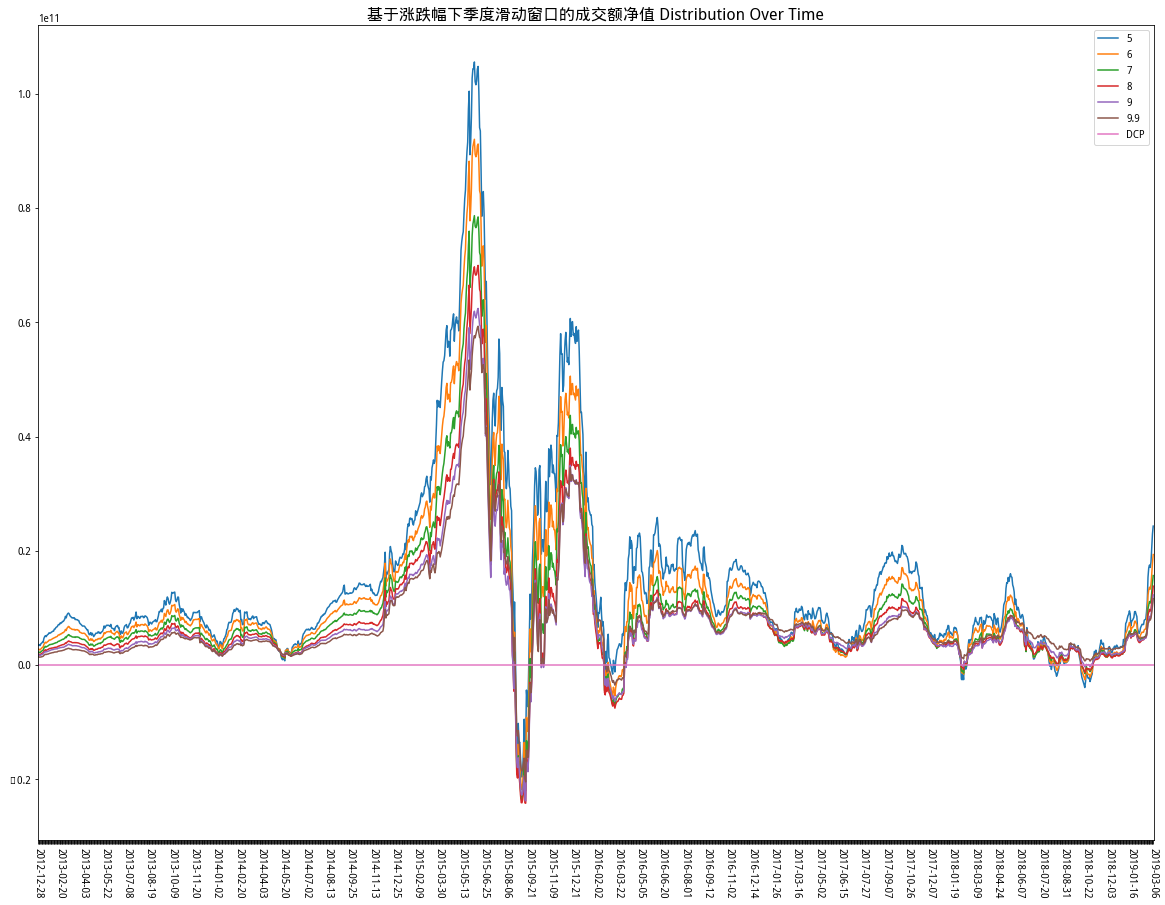

In [14]:
plt.figure(figsize=(20,15))
# print(Quantiles.iloc[:,0])
#p1 = plt.plot(range(len(interval7data.index)),interval7data['now_minus_prior_bigger_than0_sum'])
p1 = plt.plot(range(len(interval7data.index)),interval7data[ ['5','6','7','8','9','9.9','DCP'] ])
#p2 = plt.plot(range(len(interval7data.index)),interval7data['A_stock_index']/1000.00)

plt.title("基于涨跌幅下季度滑动窗口的成交额净值 Distribution Over Time", fontsize=16)
x_tick = [] 
for i in range(len(interval7data.index)): 
    if i%30 == 0:
        x_tick.append(interval7data.index[i])
    else: x_tick.append("") 
plt.legend(['5','6','7','8','9','9.9','DCP'])
plt.xticks(range(len(x_tick)), x_tick,rotation = -90)
plt.xlim(0,len(x_tick))
plt.show()

In [ ]:
def get_n_interval_data(codata=None,n=7):
    rectified_drop=[]
    for i in range(len(codata)):
        if i%n!=0:rectified_drop.append(codata.index[i])
    return codata.drop(rectified_drop)
interval7data = get_n_interval_data(Quantiles,n=1)#.replace([0],[0.01])
interval7data['now_minus_prior_bigger_than0_sum']=0;
interval7data['A_index_pc_n']=0
print ('interval7data',len(interval7data),'/',len(Quantiles))
#已经获得相应间隔数据
data_index = interval7data.index

for i in range(1, len(data_index) ):
    _d=(interval7data.iloc[i]-interval7data.iloc[i-1])#/interval7data.iloc[i]*100
    #print( _d);
    interval7data.loc[data_index[i],'now_minus_prior_bigger_than0_sum']\
                =sum([1 if j>0 else 0 for j in _d[[str(qt)for qt in Qt]].tolist() ] )
    print(_d['A_stock_index'])
    interval7data.loc[data_index[i-1],'A_index_pc_n']=int(_d['A_stock_index'].item())
    #print (interval7data.iloc[i],interval7data.iloc[i-1]);raise
print(interval7data)
xy_matrix = interval7data.iloc[np.random.permutation(len(interval7data))]
xy_matrix = xy_matrix[ [str(qt)for qt in Qt]+Qt_columns+ ['now_minus_prior_bigger_than0_sum','A_index_pc_n'] ]
as_labels_nums = len( set(xy_matrix['A_index_pc_n'].tolist()) )
xy_matrix = xy_matrix.as_matrix()
print('xy_matrix',len(xy_matrix) )

In [18]:
from sklearn.tree import DecisionTreeRegressor  
from sklearn.ensemble import RandomForestRegressor  
import numpy as np  
rf=RandomForestRegressor()#这里使用了默认的参数设置
line=int(len(xy_matrix)*5/6)
print('xy_matrix',xy_matrix.shape,'train line',line)
batch_x, batch_y = xy_matrix[0:line,0:-1],xy_matrix[0:line,[-1]].flatten()
rf.fit(batch_x,batch_y)#进行模型的训练
# Test Model
test_x, test_y = xy_matrix[line:,0:-1],xy_matrix[line:,[-1]].flatten()
instance=rf.predict(test_x) 
print('instance 0 prediction',type(instance),instance.shape ) 
result = (test_y*instance)
print('wrong rate',sum([-1 if i<0 else 0 for i in result]),'/',len(result) )
 

xy_matrix (417, 24) train line 347
instance 0 prediction <class 'numpy.ndarray'> (70,)
wrong rate -9 / 70


In [ ]:
from jqlib.technical_analysis import *
from sklearn.model_selection import train_test_split
from tensorflow.python.ops import resources
from tensorflow.contrib.tensor_forest.python import tensor_forest
import tensorflow as tf
# Parameters
num_steps = 500 # Total steps to train
batch_size = 20 # The number of samples per batch
num_classes = as_labels_nums
num_features = len(Qt+Qt_columns)+1
num_trees = 4
max_nodes = 1000
print(num_classes,num_features)
# Input and Target data
x = tf.placeholder(tf.float32, shape=[None, num_features])
# For random forest, labels must be integers (the class id)
y = tf.placeholder(tf.int32, shape=[None])
 
# Random Forest Parameters
hparams = tensor_forest.ForestHParams(num_classes=num_classes,
                                      num_features=num_features,
                                      num_trees=num_trees,
                                      max_nodes=max_nodes).fill()
 
# Build the Random Forest
forest_graph = tensor_forest.RandomForestGraphs(hparams)
# Get training graph and loss
train_op = forest_graph.training_graph(x, y)
loss_op = forest_graph.training_loss(x, y)
 
# Measure the accuracy
infer_op, _, _ = forest_graph.inference_graph(x)
correct_prediction = tf.equal(tf.argmax(infer_op, 1), tf.cast(y, tf.int64))
accuracy_op = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
 
# Initialize the variables (i.e. assign their default value) and forest resources
init_vars = tf.group(tf.global_variables_initializer(),
    resources.initialize_resources(resources.shared_resources()))
# Start TensorFlow session
sess = tf.train.MonitoredSession()
# Run the initializer
sess.run(init_vars)



12 23
INFO:tensorflow:Constructing forest with params = 
INFO:tensorflow:{'split_finish_name': 'basic', 'inference_tree_paths': False, 'param_file': None, 'pruning_type': 0, 'prune_every_samples': 0, 'stats_model_type': 0, 'max_fertile_nodes': 0, 'base_random_seed': 0, 'split_pruning_name': 'none', 'bagged_num_features': 23, 'split_name': 'less_or_equal', 'dominate_method': 'bootstrap', 'split_type': 0, 'early_finish_check_every_samples': 0, 'checkpoint_stats': False, 'split_after_samples': 250, 'leaf_model_type': 0, 'num_classes': 12, 'collate_examples': False, 'num_trees': 4, 'finish_type': 0, 'num_splits_to_consider': 10, 'model_name': 'all_dense', 'num_outputs': 1, 'use_running_stats_method': False, 'dominate_fraction': 0.99, 'bagging_fraction': 1.0, 'initialize_average_splits': False, 'regression': False, 'num_features': 23, 'valid_leaf_threshold': 1, 'num_output_columns': 13, 'max_nodes': 1000, 'feature_bagging_fraction': 1.0, 'bagged_features': None}
INFO:tensorflow:Graph was fi

In [ ]:
# Training
for i in range(1):
    line=int(len(xy_matrix)*5/6)
    print('xy_matrix',xy_matrix.shape,'line',line)
    batch_x, batch_y = xy_matrix[0:line,0:-1],xy_matrix[0:line,[-1]].flatten()
    print('batch_x',type(batch_x),batch_x.shape)
    sess.run([train_op,loss_op],feed_dict={x: batch_x, y: batch_y})
    print('Step %i, Loss: %f, Acc: %f' % (i, l, acc))

# Test Model
test_x, test_y = xy_matrix[line:,0:-1],xy_matrix[line:,[-1]].flatten()
print("Test Accuracy:", sess.run(accuracy_op, feed_dict={x: test_x, y: test_y}))